In [4]:
import numpy as np
import matplotlib.pyplot as plt
from pylab import meshgrid

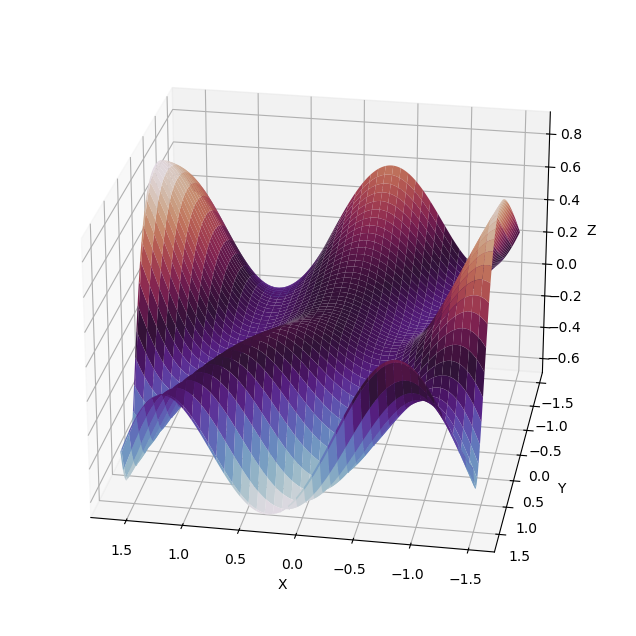

In [5]:
# Defining main function and partial derivatives
def f(x, y):
    return np.sin(1/2 * x**2 - 1/4 * y**2 + 3) * np.cos(2 * x + 1 - np.e**y)

def partial_x(x, y):
    return x * np.cos(1/2 * x**2 - 1/4 * y**2 + 3) * np.cos(2 * x + 1 - np.e**y) - 2 * np.sin(1/2 * x**2 - 1/4 * y**2 + 3) * np.sin(2 * x + 1 - np.e**y)

def partial_y(x, y):
    return -1/2 * y * np.cos(1/2 * x**2 - 1/4 * y**2 + 3) * np.cos(2 * x + 1 - np.e**y) + np.e**y * np.sin(1/2 * x**2 - 1/4 * y**2 + 3) * np.sin(2 * x + 1 - np.e**y)


# Domain of function
x = np.arange(-1.5, 1.6, 0.01)
y = np.arange(-1.5, 1.6, 0.01)

# Creating (x, y) pairs and calculating Z coordiante
X, Y = meshgrid(x, y)
Z = f(X, Y)

# Plot function
fig = plt.figure(figsize = (20, 8))
ax = fig.add_subplot(1, 1, 1, projection = '3d')
ax.plot_surface(X, Y, Z, cmap = 'twilight')
ax.view_init(25, 100)
ax.set_xlabel('X'); ax.set_ylabel('Y'); ax.set_zlabel('Z')

plt.show()

### Using this to create a 3D plot of LEPS-II

In [7]:
import numpy as np
import matplotlib.pyplot as plt

def Q_orig(d, alpha, r, r0):
     return (d / 2) * (1.5 * np.exp(-2 * alpha * (r - r0)) - np.exp(-alpha * (r - r0)))
    
def J_orig(d, alpha, r, r0):
     return (d / 4) * (np.exp(-2 * alpha * (r - r0)) - 6 * np.exp(-alpha * (r - r0)))
    
def V_LEPS(rAB, rBC):
    a = 0.05
    b = 0.30
    c = 0.05
    dAB = dBC = 4.746
    dAC = 3.445
    r0 = 0.742
    alpha = 1.942
    QAB = Q_orig(dAB, alpha, rAB, r0)
    QBC = Q_orig(dBC, alpha, rBC, r0)
    rAC = rAB + rBC
    QAC = Q_orig(dAC, alpha, rAC, r0)
    Q_values = (QAB / (1 + a)) + (QBC / (1 + b)) + (QAC / (1 + c)) 
    
    JAB = J_orig(dAB, alpha, rAB, r0)
    JBC = J_orig(dBC, alpha, rBC, r0)
    JAC = J_orig(dAC, alpha, rAC, r0)
    J_values = (JAB / (1 + a))**2 + (JBC / (1 + b))**2 + (JAC / (1 + c))**2
    J_values = J_values - ((JAB*JBC/((1+a)*(1+b))) + (JBC*JAC/((1+b)*(1+c))) + (JAB*JAC/((1+a)*(1+c))))
    return Q_values - np.sqrt(J_values)

def V_LEPS_II(rAB, x):
    rAC = 3.742
    kC = 0.2025
    V_normal = V_LEPS(rAB, rAC - rAB)
    c = 1.154
    return V_normal + 2 * kC * (rAB - (rAC / 2 - x / c))**2

In [68]:
rAB, rBC = np.meshgrid(np.arange(0.2, 2.0, 0.05), np.arange(0.2, 4.1, 0.05))

rAB_II, x = np.meshgrid(np.arange(0.4, 3.5, 0.05), np.arange(-2, 2.5, 0.05))

LEPS = V_LEPS(rAB, rBC)
LEPS_II = V_LEPS_II(rAB_II, x)

Text(0.5, 0, 'U')

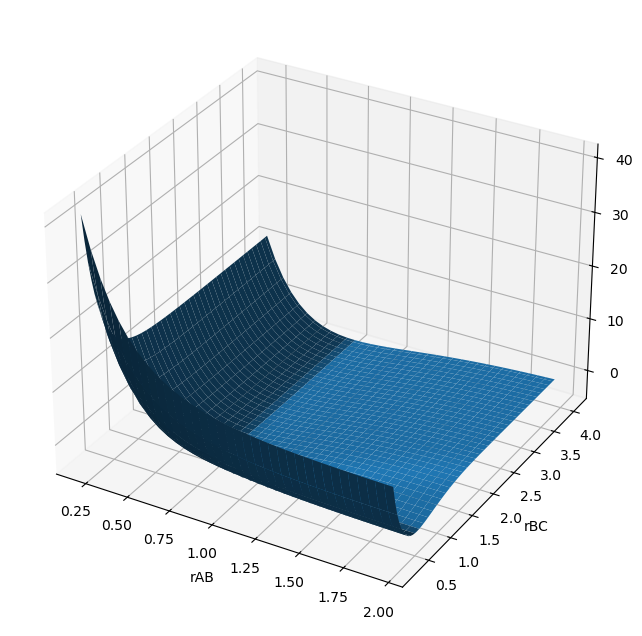

In [69]:
fig = plt.figure(figsize = (20, 8))
ax = fig.add_subplot(projection = '3d')
ax.plot_surface(rAB, rBC, LEPS)
# ax.view_init(0, 100)
ax.set_xlabel('rAB'); ax.set_ylabel('rBC'); ax.set_zlabel('U')

Text(0.5, 0, 'U')

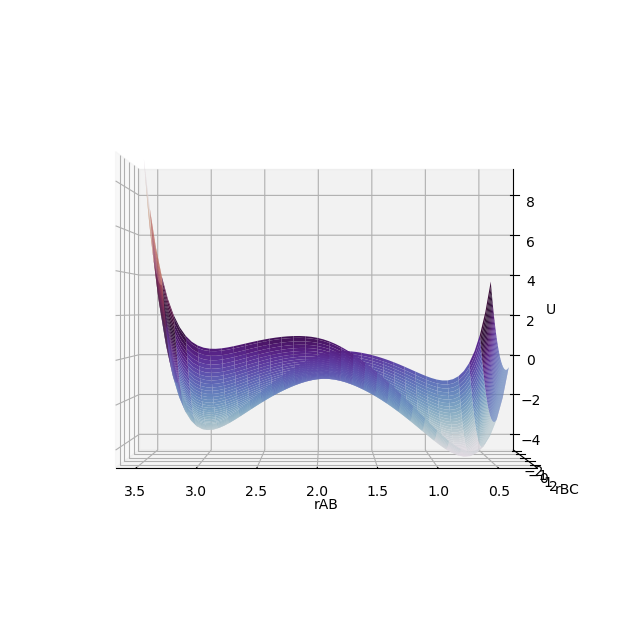

In [82]:
fig = plt.figure(figsize = (20, 8))
ax = fig.add_subplot(projection = '3d')
ax.plot_surface(rAB_II, x, LEPS_II, cmap='twilight')
ax.view_init(0, 90, 0)
ax.set_xlabel('rAB'); ax.set_ylabel('rBC'); ax.set_zlabel('U')